In [9]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/scripts/Mixture + Analytes/8 Mixtures')

from utils import plot_lda_decision_boundary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import re

os.chdir('/home/soham/Desktop/GitHub/BTP/')

## Without 112 & 121

In [10]:
lda_data = pd.read_excel('data/mixture/8 solutions/LDA_without_112_121.xlsx')
lda_data.head()

,LD1,LD2,Labels
0,-3.567703,1.872287,A1
1,-3.893028,1.174235,A1
2,-3.044961,-1.028632,A1
3,-3.034251,-1.358815,A1
4,-3.069544,-1.368600,A1


In [11]:
X = lda_data[['LD1','LD2']]
Y = lda_data['Labels'].map({'Mix_101':0, 'A1':1, 'A2':2, 'A3':3, 'Mix_111':4, 'Mix_211':5})

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

# Training accuracy

train_pred = svm.predict(X_train)
print(f'Training accuracy = {accuracy_score(train_pred, Y_train)}')


# Testing accuracy

test_pred = svm.predict(X_test)
print(f'Testing accuracy = {accuracy_score(test_pred, Y_test)}')

Training accuracy = 0.9791666666666666
Testing accuracy = 0.9166666666666666


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


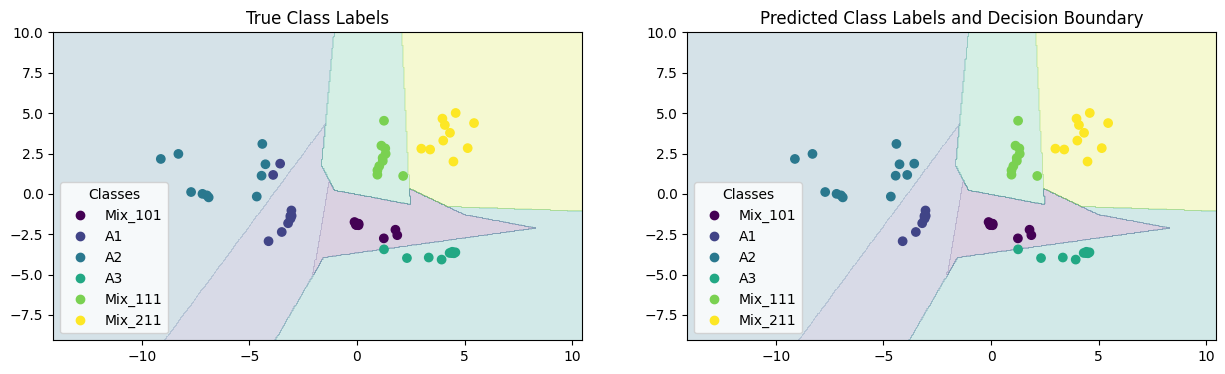

In [12]:
label_mapping = {0: 'Mix_101', 1: 'A1', 2: 'A2', 3: 'A3', 4: 'Mix_111', 5:'Mix_211'}
plot_lda_decision_boundary(lda_data, svm, label_mapping)

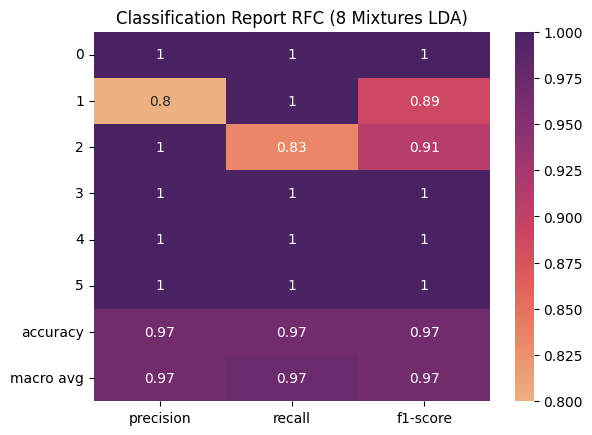

In [13]:
''' Confusion matrix '''

predictions = svm.predict(X)

report = classification_report(predictions, Y, output_dict=True)
report = pd.DataFrame(report).transpose()

sns.heatmap(report.iloc[:-1, :-1], annot=True, cmap='flare')
plt.title('Classification Report RFC (8 Mixtures LDA)')
plt.show()

## With 112 & 121

In [14]:
lda_data = pd.read_excel('data/mixture/8 solutions/LDA_with_112_121.xlsx')
lda_data.head()

,LD1,LD2,Labels
0,4.028489,-0.112134,A1
1,4.394760,-0.333785,A1
2,3.983606,-0.493548,A1
3,4.028883,-0.515631,A1
4,4.064155,-0.511202,A1


In [15]:
X = lda_data[['LD1','LD2']]
Y = lda_data['Labels'].map({'Mix_101':0, 'A1':1, 'A2':2, 'A3':3, 'Mix_111':4, 'Mix_211':5, 'Mix_112':6, 'Mix_121':7})

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

# Training accuracy

train_pred = svm.predict(X_train)
print(f'Training accuracy = {accuracy_score(train_pred, Y_train)}')


# Testing accuracy

test_pred = svm.predict(X_test)
print(f'Testing accuracy = {accuracy_score(test_pred, Y_test)}')

Training accuracy = 0.890625
Testing accuracy = 0.8125


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


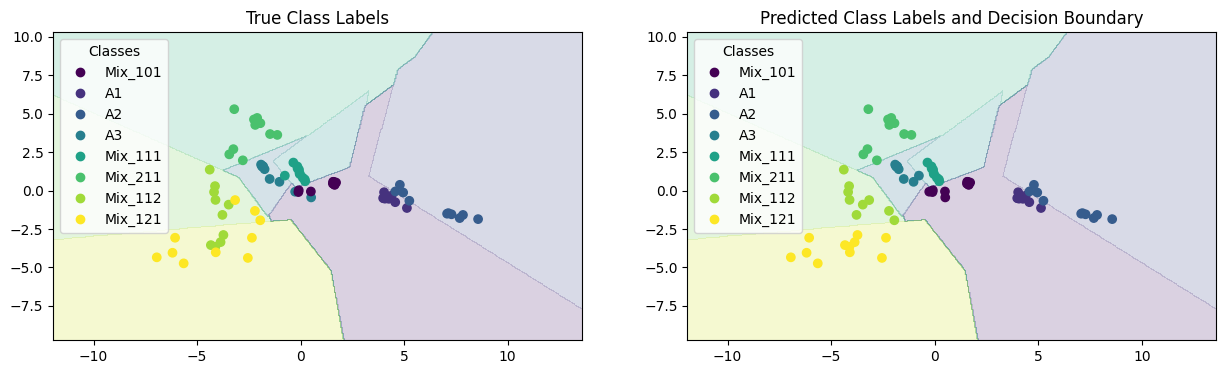

In [16]:
label_mapping = {0: 'Mix_101', 1: 'A1', 2: 'A2', 3: 'A3', 4: 'Mix_111', 5:'Mix_211', 6:'Mix_112', 7:'Mix_121'}
plot_lda_decision_boundary(lda_data, svm, label_mapping)

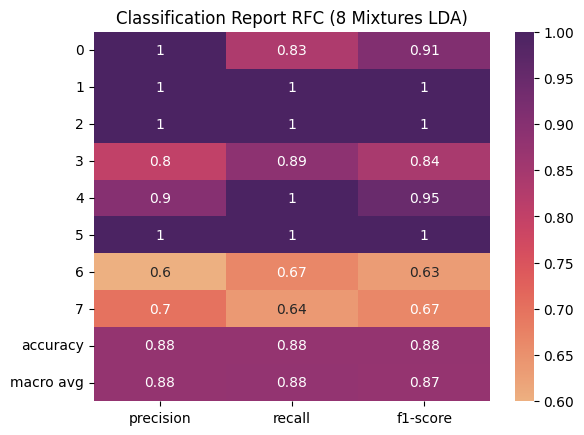

In [17]:
''' Confusion matrix '''

predictions = svm.predict(X)

report = classification_report(predictions, Y, output_dict=True)
report = pd.DataFrame(report).transpose()

sns.heatmap(report.iloc[:-1, :-1], annot=True, cmap='flare')
plt.title('Classification Report RFC (8 Mixtures LDA)')
plt.show()